In [1]:
import numpy as np 

# get scope embeddings from protein-vec
scope_protein_vec = np.load('/home/seyonec/protein-vec/src_run/protein_vec_embeddings/scope_all_query_embeddings.npy')

scope_protein_vec

array([[-8.833175  ,  6.2180605 ,  4.0923424 , ...,  0.86910766,
         5.8197947 , -2.3120422 ],
       [-8.853158  ,  6.249927  ,  4.083178  , ...,  0.8791264 ,
         5.7989206 , -2.371441  ],
       [-8.916473  ,  6.2099814 ,  4.185398  , ...,  0.821151  ,
         5.732552  , -2.4643846 ],
       ...,
       [-8.760139  ,  6.303917  ,  3.9584808 , ...,  0.9510072 ,
         5.79847   , -2.4893646 ],
       [-8.788359  ,  6.1799445 ,  4.1283817 , ...,  0.8592501 ,
         5.7609444 , -2.4434512 ],
       [-8.842473  ,  6.3074102 ,  4.146958  , ...,  0.7476833 ,
         5.682734  , -2.467361  ]], dtype=float32)

In [2]:
scope_protein_vec.shape

(15177, 512)

In [3]:
import pandas as pd

scope_df = pd.read_csv('/home/seyonec/toph/data/scope/df_from_fasta.csv')
scope_df

,Unnamed: 0,sequence,sid,sccs,class,fold,superfamily,family
0,0,slfeqlggqaavqavtaqfyaniqadatvatffngidmpnqtnkta...,d1dlwa_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
1,1,gllsrlrkrepisiydkiggheaievvvedffvrvladdqlsaffs...,d2gkma_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
2,2,ksfydavggaktfdaivsrfyaqvaedevlrrvypeddlagaeerl...,d1ngka_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
3,3,eqwqtlyeaiggeetvaklveafyrrvaahpdlrpifpddltetah...,d2bkma_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
4,4,aslyeklggaaavdlavekfygkvladervnrffvntdmakqkqhq...,d4i0va_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
...,...,...,...,...,...,...,...,...
15172,15172,mpkvkrsrkappdgwelieptldeldqkmreaetephegkrkvesl...,d6id0n_,g.99.1.1,g,g.99,g.99.1,g.99.1.1
15173,15173,nepppniceqclgdeanirmtkipqgseckictlpftlyhfktskr...,d5lj3n2,g.100.1.1,g,g.100,g.100.1,g.100.1.1
15174,15174,akhhpdlifcrkqagvaigrlcekcdgkcvicdsyvrpstlvricd...,d5syba_,g.101.1.1,g,g.101,g.101.1,g.101.1.1
15175,15175,rycvfshdemickmaskadvldvvvastvqkdmaimiedekalret...,d5fyza2,g.102.1.0,g,g.102,g.102.1,g.102.1.0


In [4]:
import pandas as pd
scope_test = pd.read_csv("/home/ron/toph/data/scope/progres_scope_test.txt", sep=" ", header=None, names=["sid", "sccs"])
scope_test

,sid,sccs
0,d3bb6a1,b.82.2.13
1,d1vqta1,c.1.2.3
2,d3nara_,a.4.1.1
3,d3euca_,c.67.1.0
4,d3aowa_,c.67.1.0
...,...,...
395,d2fjca1,a.25.1.1
396,d2mska_,c.23.1.1
397,d3eura1,c.47.1.0
398,d1p4ca_,c.1.4.1


In [5]:
# get test ids

test_idcs = scope_df["sid"].isin(scope_test["sid"])
test_idcs.sum()

400

In [6]:
lookup_df = scope_df[~test_idcs]
test_df = scope_df[test_idcs]


In [11]:
test_df

,Unnamed: 0,sequence,sid,sccs,class,fold,superfamily,family
6,6,eelseaerkavqamwarlyancedvgvailvrffvnfpsakqyfsq...,d2dc3a_,a.1.1.2,a,a.1,a.1.1,a.1.1.2
15,15,psvydaaaqltadvkkdlrdswkvigsdkkgngvalmttlfadnqe...,d3g46a_,a.1.1.2,a,a.1,a.1.1,a.1.1.2
27,27,tltkheqdillkelgphvdtpahivetglgayhalftahpqyishf...,d1h97a_,a.1.1.2,a,a.1,a.1.1,a.1.1.2
35,35,tkeqiqiikdcvpilqkngedltnefykimfndypevkpmfnmekq...,d2wy4a_,a.1.1.0,a,a.1,a.1.1,a.1.1.0
53,53,maptlseqtrqlvrasvpalqkhsvaisatmyrllferypetrslf...,d6wk3a_,a.1.1.0,a,a.1,a.1.1,a.1.1.0
...,...,...,...,...,...,...,...,...
14544,14544,dicpgtakgktncpatvingqfvercwthshcqkvcptickshgct...,d2hr7a2,g.3.9.0,g,g.3,g.3.9,g.3.9.0
14594,14594,aprlpqcqgddqekclcnkdecppgqcrfprgdadpyce,d1deca_,g.3.15.2,g,g.3,g.3.15,g.3.15.2
14947,14947,ktggtqtdlftcgkckkknctytqvqtrsadepmttfvvcnecgnr...,d1tfia_,g.41.3.1,g,g.41,g.41.3,g.41.3.1
14985,14985,mstknfrvsdgdwicpdkkcgnvnfarrtscdrcgrektt,d1n0za1,g.41.11.1,g,g.41,g.41.11,g.41.11.1


In [14]:
lookup_df.to_csv("/home/seyonec/protein-conformal/scope_lookup_df.csv", index=False)
test_df.to_csv("/home/seyonec/protein-conformal/scope_test_df.csv", index=False)

In [7]:
lookup_embeddings = scope_protein_vec[~test_idcs]
lookup_embeddings.shape

(14777, 512)

In [8]:
test_embeddings = scope_protein_vec[test_idcs]
test_embeddings.shape

(400, 512)

In [9]:
# count number of unique idcs in test_idcs and lookup_idcs
len(set(lookup_df["sid"])) + len(set(test_df["sid"]))

15177

In [10]:
lookup_df

,Unnamed: 0,sequence,sid,sccs,class,fold,superfamily,family
0,0,slfeqlggqaavqavtaqfyaniqadatvatffngidmpnqtnkta...,d1dlwa_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
1,1,gllsrlrkrepisiydkiggheaievvvedffvrvladdqlsaffs...,d2gkma_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
2,2,ksfydavggaktfdaivsrfyaqvaedevlrrvypeddlagaeerl...,d1ngka_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
3,3,eqwqtlyeaiggeetvaklveafyrrvaahpdlrpifpddltetah...,d2bkma_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
4,4,aslyeklggaaavdlavekfygkvladervnrffvntdmakqkqhq...,d4i0va_,a.1.1.1,a,a.1,a.1.1,a.1.1.1
...,...,...,...,...,...,...,...,...
15172,15172,mpkvkrsrkappdgwelieptldeldqkmreaetephegkrkvesl...,d6id0n_,g.99.1.1,g,g.99,g.99.1,g.99.1.1
15173,15173,nepppniceqclgdeanirmtkipqgseckictlpftlyhfktskr...,d5lj3n2,g.100.1.1,g,g.100,g.100.1,g.100.1.1
15174,15174,akhhpdlifcrkqagvaigrlcekcdgkcvicdsyvrpstlvricd...,d5syba_,g.101.1.1,g,g.101,g.101.1,g.101.1.1
15175,15175,rycvfshdemickmaskadvldvvvastvqkdmaimiedekalret...,d5fyza2,g.102.1.0,g,g.102,g.102.1,g.102.1.0


In [13]:
from scope_utils import scope_hierarchical_loss, load_database, query
# in this case we want to do all vs all search, so our lookup and query are the same
lookup = load_database(lookup_embeddings)
#query = load_database(scope_protein_vec)

## get distance matrix
D, I = query(lookup, test_embeddings, k=14777)



In [14]:
I

array([[   23,    19,    15, ..., 12110,  7353,  7438],
       [    9,    13,    22, ..., 12110,  7353,  7438],
       [   13,    50,    20, ..., 12110,  7353,  7438],
       ...,
       [14544, 14556, 14546, ..., 12391, 12433, 12403],
       [14584, 14534, 14536, ..., 10879,  7438,  7353],
       [14669, 14666, 14671, ..., 13948,  7353,  7438]])

In [15]:
test_df

,Unnamed: 0,sequence,sid,sccs,class,fold,superfamily,family
6,6,eelseaerkavqamwarlyancedvgvailvrffvnfpsakqyfsq...,d2dc3a_,a.1.1.2,a,a.1,a.1.1,a.1.1.2
15,15,psvydaaaqltadvkkdlrdswkvigsdkkgngvalmttlfadnqe...,d3g46a_,a.1.1.2,a,a.1,a.1.1,a.1.1.2
27,27,tltkheqdillkelgphvdtpahivetglgayhalftahpqyishf...,d1h97a_,a.1.1.2,a,a.1,a.1.1,a.1.1.2
35,35,tkeqiqiikdcvpilqkngedltnefykimfndypevkpmfnmekq...,d2wy4a_,a.1.1.0,a,a.1,a.1.1,a.1.1.0
53,53,maptlseqtrqlvrasvpalqkhsvaisatmyrllferypetrslf...,d6wk3a_,a.1.1.0,a,a.1,a.1.1,a.1.1.0
...,...,...,...,...,...,...,...,...
14544,14544,dicpgtakgktncpatvingqfvercwthshcqkvcptickshgct...,d2hr7a2,g.3.9.0,g,g.3,g.3.9,g.3.9.0
14594,14594,aprlpqcqgddqekclcnkdecppgqcrfprgdadpyce,d1deca_,g.3.15.2,g,g.3,g.3.15,g.3.15.2
14947,14947,ktggtqtdlftcgkckkknctytqvqtrsadepmttfvvcnecgnr...,d1tfia_,g.41.3.1,g,g.41,g.41.3,g.41.3.1
14985,14985,mstknfrvsdgdwicpdkkcgnvnfarrtscdrcgrektt,d1n0za1,g.41.11.1,g,g.41,g.41.11,g.41.11.1


In [16]:
# get indices of true elements in test_idcs
true_test_idcs = np.where(test_idcs)[0]
true_test_idcs

array([    6,    15,    27,    35,    53,    55,    94,   168,   174,
         186,   194,   198,   221,   225,   234,   235,   245,   281,
         288,   294,   333,   340,   384,   424,   460,   464,   493,
         518,   525,   546,   551,   557,   600,   610,   811,   848,
         893,  1023,  1032,  1194,  1200,  1203,  1204,  1214,  1226,
        1232,  1237,  1428,  1439,  1446,  1455,  1457,  1760,  1769,
        1784,  1794,  1941,  1946,  1954,  1972,  1973,  1995,  2015,
        2032,  2055,  2663,  2678,  2761,  2764,  2772,  2775,  2806,
        2812,  2815,  2816,  2836,  2848,  2853,  2872,  2875,  2904,
        2924,  2953,  2973,  3030,  3035,  3039,  3052,  3066,  3102,
        3105,  3127,  3180,  3183,  3206,  3216,  3218,  3219,  3246,
        3252,  3258,  3265,  3266,  3269,  3348,  3355,  3365,  3366,
        3398,  3404,  3413,  3428,  3614,  3756,  3769,  3773,  3834,
        3837,  3877,  3882,  3912,  3920,  3938,  3946,  3955,  4105,
        4133,  4134,

In [17]:
lookup_idcs = scope_df["sid"].isin(scope_test["sid"])

# invert lookup_idcs array
lookup_idcs = ~lookup_idcs

lookup_idcs = np.where(lookup_idcs)[0]
lookup_idcs

array([    0,     1,     2, ..., 15174, 15175, 15176])

In [18]:
(lookup_df.index == lookup_idcs).sum()

14777

In [19]:
# index row i column 'sccs' of test_df
test_df.loc[true_test_idcs[0], 'sccs']

'a.1.1.2'

In [20]:
test_df.loc[true_test_idcs[0], 'sccs'] == lookup_df.loc[lookup_idcs[0], 'sccs']

False

In [21]:
test_df.loc[true_test_idcs[0], 'sid']

'd2dc3a_'

In [22]:
true_test_idcs.tolist()

[6,
 15,
 27,
 35,
 53,
 55,
 94,
 168,
 174,
 186,
 194,
 198,
 221,
 225,
 234,
 235,
 245,
 281,
 288,
 294,
 333,
 340,
 384,
 424,
 460,
 464,
 493,
 518,
 525,
 546,
 551,
 557,
 600,
 610,
 811,
 848,
 893,
 1023,
 1032,
 1194,
 1200,
 1203,
 1204,
 1214,
 1226,
 1232,
 1237,
 1428,
 1439,
 1446,
 1455,
 1457,
 1760,
 1769,
 1784,
 1794,
 1941,
 1946,
 1954,
 1972,
 1973,
 1995,
 2015,
 2032,
 2055,
 2663,
 2678,
 2761,
 2764,
 2772,
 2775,
 2806,
 2812,
 2815,
 2816,
 2836,
 2848,
 2853,
 2872,
 2875,
 2904,
 2924,
 2953,
 2973,
 3030,
 3035,
 3039,
 3052,
 3066,
 3102,
 3105,
 3127,
 3180,
 3183,
 3206,
 3216,
 3218,
 3219,
 3246,
 3252,
 3258,
 3265,
 3266,
 3269,
 3348,
 3355,
 3365,
 3366,
 3398,
 3404,
 3413,
 3428,
 3614,
 3756,
 3769,
 3773,
 3834,
 3837,
 3877,
 3882,
 3912,
 3920,
 3938,
 3946,
 3955,
 4105,
 4133,
 4134,
 4139,
 4142,
 4145,
 4156,
 4176,
 4177,
 4194,
 4199,
 4205,
 4230,
 4233,
 4237,
 4313,
 4328,
 4337,
 4345,
 4349,
 4367,
 4369,
 4371,
 4405,
 4

In [23]:
lookup_idcs

array([    0,     1,     2, ..., 15174, 15175, 15176])

In [117]:
sum(I[1] > 15000)

0

In [123]:
lookup_idcs[14776]

15176

In [121]:
lookup_idcs

array([    0,     1,     2, ..., 15174, 15175, 15176])

In [125]:
near_ids = []

for i in range(len(true_test_idcs)):
    test_id = test_df.loc[true_test_idcs[i], 'sid']
    test_sccs = test_df.loc[true_test_idcs[i], 'sccs']
    query_ids = [lookup_df.loc[lookup_idcs[j], 'sid'] for j in I[i]]
    mask_exact = [test_sccs == lookup_df.loc[lookup_idcs[j], 'sccs'] for j in I[i]]

    near_ids.append({
        'test_id': test_id,
        'query_ids': query_ids,
        #'meta_query': meta_query,
        'exact': mask_exact,
        #'partial': mask_partial,
        'S_i': D[i],
        'I_i': I[i]
    })

In [128]:
## number of trues in list
#sum([n['exact'] for x in near_ids])
sum(near_ids[210]['exact'])

26

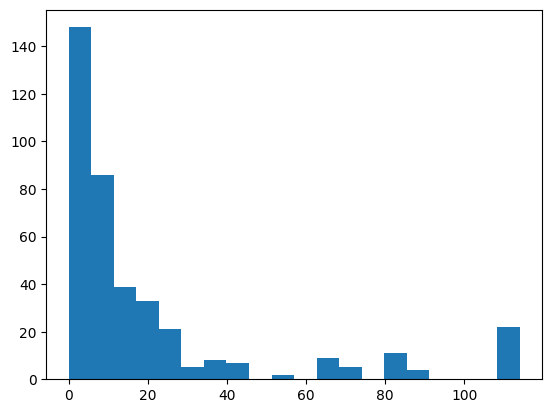

In [129]:
## Plot histogram of near_idws[i]['exact'] for i in range(400)
import matplotlib.pyplot as plt
plt.hist([sum(n['exact']) for n in near_ids], bins=20)
plt.show()

In [137]:
np.save('near_ids_scope_test_v_lookup.npy', near_ids)


In [ ]:
import numpy as np

near_ids = np.load('near_ids_scope_test_v_lookup.npy', allow_pickle=True)
near_ids

In [3]:
## find number of matching elements
exact_matches = np.array([sum(n['exact']) for n in near_ids])

# find numb3er of elements with 0 matches
(exact_matches == 0).sum()

2

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import ipdb
from sklearn.isotonic import IsotonicRegression
import seaborn as sns
from scipy.stats import binom, norm

def get_sims_labels(data, partial=False):
    sims = []
    labels = []
    for query in data:
        similarity = query['S_i']
        sims += similarity.tolist()
        if partial:
            #labels_to_append = np.logical_or.reduce(query['partial'], axis=1).tolist()
            # NOTE: no need to do the above for scope - i already handle the pre-processing
            labels_to_append = query['partial']
        else:
            labels_to_append = query['exact']
        labels += labels_to_append
    return sims, labels

def get_thresh(data, alpha):
    # conformal risk control
    all_sim_exact = []
    for query in data:
        idx = query['exact']
        similarity = query['S_i']
        sims_to_append = similarity[idx]
        all_sim_exact += list(sims_to_append)
        n = len(all_sim_exact)
        if n > 0:
            lhat = np.quantile(all_sim_exact, np.maximum(alpha-(1-alpha)/n, 0), interpolation='lower')
        else:
            lhat = 0
    return lhat

# Bentkus p value
def bentkus_p_value(r_hat,n,alpha):
    return binom.cdf(np.ceil(n*r_hat),n,alpha/np.e)

# def clt_p_value(r_hat,n,alpha):

def clt_p_value(r_hat, std_hat, n, alpha):
    z = (r_hat - alpha) / (std_hat / np.sqrt(n))
    p_value = norm.cdf(z)
    return p_value
    
def percentage_of_discoveries(sims, labels, lam):
    # FDR: Number of false matches / number of matches
    total_discoveries = (sims >= lam).sum(axis=1)
    return total_discoveries.mean() / len(labels) # or sims.shape[1]

def risk(sims, labels, lam):
    # FDR: Number of false matches / number of matches
    total_discoveries = (sims >= lam).sum(axis=1)
    false_discoveries = ((1-labels)*(sims >= lam)).sum(axis=1)
    total_discoveries = np.maximum(total_discoveries, 1)
    return (false_discoveries/total_discoveries).mean()

def calculate_false_negatives(sims, labels, lam):
    # FNR: Number of false non-matches / number of non-matches
    total_non_matches = labels.sum(axis=1)
    false_non_matches = (labels & (sims < lam)).sum(axis=1)
    total_non_matches = np.maximum(total_non_matches, 1)
    return (false_non_matches/total_non_matches).mean()

def risk_no_empties(sims, labels, lam):
    # FDR: Number of false matches / number of matches
    total_discoveries = (sims >= lam).sum(axis=1)
    false_discoveries = ((1-labels)*(sims >= lam)).sum(axis=1)
    idx = total_discoveries > 0
    total_discoveries = total_discoveries[idx]
    false_discoveries = false_discoveries[idx]
    return (false_discoveries/total_discoveries).mean()

def std_loss(sims, labels, lam):
    # FDR: Number of false matches / number of matches
    total_discoveries = (sims >= lam).sum(axis=1)
    false_discoveries = ((1-labels)*(sims >= lam)).sum(axis=1)
    total_discoveries = np.maximum(total_discoveries, 1)
    return (false_discoveries/total_discoveries).std()

def get_thresh_FDR(labels, sims, alpha, delta=0.5, N=5000):
    # FDR control with LTT
    # labels = np.stack([query['exact'] for query in data], axis=0)
    # sims = np.stack([query['S_i'] for query in data], axis=0)
    print(f"sims.max: {sims.max()}")
    n = len(labels)
    lambdas = np.linspace(sims.min(),sims.max(),N)
    risks = np.array( [risk(sims, labels, lam) for lam in lambdas] )
    stds = np.array( [std_loss(sims, labels, lam) for lam in lambdas] )
    #pvals = np.array( [bentkus_p_value(r,n,alpha) for r in risks] )
    pvals = np.array( [clt_p_value(r,s,n,alpha) for r, s in zip(risks, stds)] )
    below = pvals <= delta
    # Pick the smallest lambda such that all lambda above it have p-value below delta
    pvals_satisfy_condition = np.array([ np.all(below[i:])for i in range(N) ])
    lhat = lambdas[np.argmax(pvals_satisfy_condition)]
    print(f"lhat: {lhat}")
    print(f"risk: {risk(sims, labels, lhat)}")
    return lhat

def get_isotone_regression(data):
    sims, labels = get_sims_labels(data, partial=True)
    ir = IsotonicRegression(out_of_bounds='clip')
    ir.fit(sims, labels)
    return ir


(array([2.000e+00, 2.800e+01, 5.000e+01, 1.160e+02, 2.260e+02, 5.170e+02,
        9.520e+02, 1.648e+03, 3.107e+03, 1.710e+03]),
 array([0.9996711 , 0.99970348, 0.99973587, 0.99976825, 0.99980063,
        0.99983302, 0.9998654 , 0.99989778, 0.99993017, 0.99996255,
        0.99999493]),
 <BarContainer object of 10 artists>)

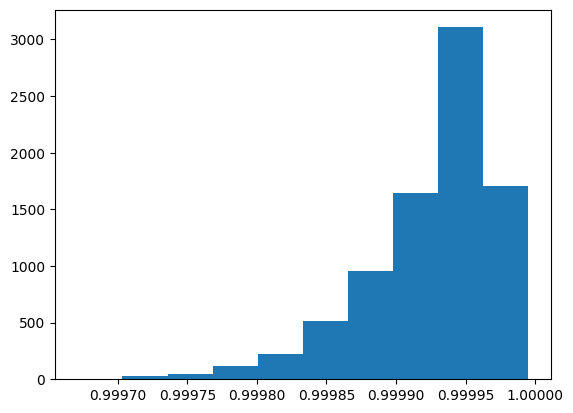

In [6]:
sims, labels = get_sims_labels(near_ids, partial=False)
plt.hist(np.array(sims)[np.array(labels).astype(bool)]) # plot exact matches as a function of their similarity score

In [12]:
len(sims) == 14777 * 400

True

In [13]:
len(labels) == 14777 * 400

True

In [18]:
## reshape sims to be (400, 14777)
sims = np.array(sims).reshape(400, 14777)

lam = sims.max()

## return boolean array of all elements in sims that are greater than lam
sims < lam

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [23]:
(sims < lam).sum(axis=1).shape

(400,)

In [24]:
sims.min() ## protein-vec similarities are weiiiird

0.9992992877960205

In [27]:
labels.shape

(400, 14777)

In [28]:
# Plot FDR as a function of lambda
# sims, labels = get_sims_labels(data, partial=False)
labels = np.stack([query['exact'] for query in near_ids], axis=0)
sims = np.stack([query['S_i'] for query in near_ids], axis=0)


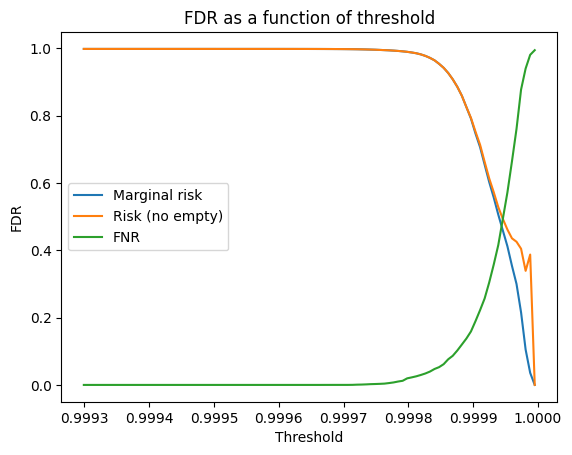

In [29]:
plt.figure()

lambdas = np.linspace(sims.min(),sims.max(),100)
risks = [risk(sims, labels, lam) for lam in lambdas]
risks_no_empties = [risk_no_empties(sims, labels, lam) for lam in lambdas]
# percentage_of_discoveries_rsk = [percentage_of_discoveries(sims, labels, lam) for lam in lambdas]
fnr = [calculate_false_negatives(sims, labels, lam) for lam in lambdas]
plt.plot(lambdas, risks, label='Marginal risk')
plt.plot(lambdas, risks_no_empties, label='Risk (no empty)')
# plt.plot(lambdas, percentage_of_discoveries_rsk, label='Percentage of discoveries')
plt.plot(lambdas, fnr, label='FNR')
plt.xlabel('Threshold')
plt.ylabel('FDR')
plt.title('FDR as a function of threshold')
plt.legend()
plt.show()

#### now, we write some code to get partial matches, and hierarchical losses in the dict

In [2]:
def scope_hierarchical_loss(y_sccs, y_hat_sccs):
    """
    Find the common ancestor of two sets of SCCs (0 if family, 1 if superfamily, 2 if fold, 3 if class)
    """
    y_sccs, y_hat_sccs = y_sccs.split('.'), y_hat_sccs.split('.')
    first_non_matching_index = next((i for i, (x, y) in enumerate(zip(y_sccs, y_hat_sccs)) if x != y), len(y_sccs))

    loss = len(y_sccs) - first_non_matching_index # ex if the first mismatch is at idx 2 (0-indexed), that means that the second last label (superfamily) is wrong, which is a loss of two (wrong family & superfamily)
    exact = True if len(y_sccs) == first_non_matching_index else False

    return loss, exact


In [3]:
test_y = 'a.1.1.1'
test_y_hat = 'a.1.1.1'

print(scope_hierarchical_loss(test_y, test_y_hat))

(0, True)


In [30]:
near_ids = []

for i in range(len(true_test_idcs)):
    test_id = test_df.loc[true_test_idcs[i], 'sid']
    test_sccs = test_df.loc[true_test_idcs[i], 'sccs']
    query_ids = [lookup_df.loc[lookup_idcs[j], 'sid'] for j in I[i]]
    exact_loss = [scope_hierarchical_loss(test_sccs, lookup_df.loc[lookup_idcs[j], 'sccs']) for j in I[i]]
    # grab the 2nd element in the tuple belonging to each element of exact_loss as mask_exact
    mask_exact = [x[1] for x in exact_loss]
    loss = [x[0] for x in exact_loss]
    
    # define mask_partial as 1 for any element of loss that is <=1 (tolerate retrieving homolog with diff family but same superfamily)
    mask_partial = [l <= 1 for l in loss]

    #mask_exact = [test_sccs == lookup_df.loc[lookup_idcs[j], 'sccs'] for j in I[i]]
    near_ids.append({
        'test_id': test_id,
        'query_ids': query_ids,
        #'meta_query': meta_query,
        'loss' : loss,
        'exact': mask_exact,
        'partial': mask_partial,
        'S_i': D[i],
        'I_i': I[i]
    })

In [ ]:
np.save('partial_near_ids_scope_test_v_lookup.npy', near_ids)


In [4]:
near_ids = np.load('partial_near_ids_scope_test_v_lookup.npy', allow_pickle=True)
len(near_ids)

400

(array([2.000e+00, 2.800e+01, 5.000e+01, 1.160e+02, 2.260e+02, 5.170e+02,
        9.520e+02, 1.648e+03, 3.107e+03, 1.710e+03]),
 array([0.9996711 , 0.99970348, 0.99973587, 0.99976825, 0.99980063,
        0.99983302, 0.9998654 , 0.99989778, 0.99993017, 0.99996255,
        0.99999493]),
 <BarContainer object of 10 artists>)

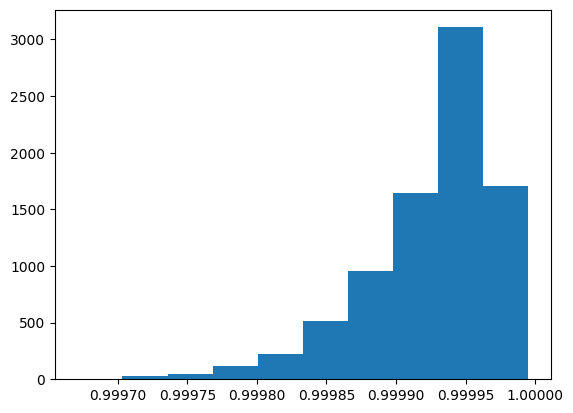

In [5]:
sims, labels = get_sims_labels(near_ids, partial=False)
plt.hist(np.array(sims)[np.array(labels).astype(bool)]) # plot exact matches as a function of their similarity score

(array([1.000e+00, 4.000e+00, 4.000e+01, 2.080e+02, 7.140e+02, 1.716e+03,
        3.593e+03, 5.693e+03, 7.994e+03, 4.774e+03]),
 array([0.99958587, 0.99962677, 0.99966768, 0.99970859, 0.99974949,
        0.9997904 , 0.99983131, 0.99987221, 0.99991312, 0.99995403,
        0.99999493]),
 <BarContainer object of 10 artists>)

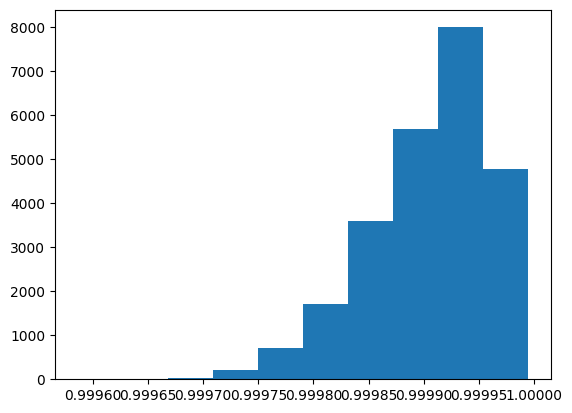

In [12]:
## Lets look at the quantity of partial matches by similarity score

sims, labels = get_sims_labels(near_ids, partial=True)
plt.hist(np.array(sims)[np.array(labels).astype(bool)]) # plot exact matches as a function of their similarity score

### re-compute exact FDR curve

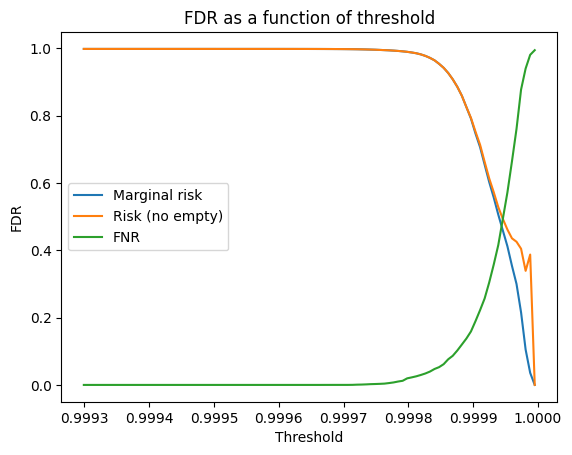

In [14]:
plt.figure()
# Plot FDR as a function of lambda
# sims, labels = get_sims_labels(data, partial=False)
labels = np.stack([query['exact'] for query in near_ids], axis=0)
sims = np.stack([query['S_i'] for query in near_ids], axis=0)
lambdas = np.linspace(sims.min(),sims.max(),100)
risks = [risk(sims, labels, lam) for lam in lambdas]
risks_no_empties = [risk_no_empties(sims, labels, lam) for lam in lambdas]
# percentage_of_discoveries_rsk = [percentage_of_discoveries(sims, labels, lam) for lam in lambdas]
fnr = [calculate_false_negatives(sims, labels, lam) for lam in lambdas]
plt.plot(lambdas, risks, label='Marginal risk')
plt.plot(lambdas, risks_no_empties, label='Risk (no empty)')
# plt.plot(lambdas, percentage_of_discoveries_rsk, label='Percentage of discoveries')
plt.plot(lambdas, fnr, label='FNR')
plt.xlabel('Threshold')
plt.ylabel('FDR')
plt.title('FDR as a function of threshold')
plt.legend()
plt.show()

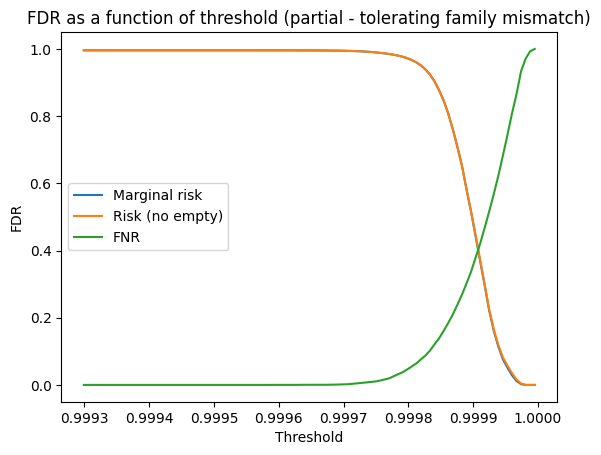

In [16]:
plt.figure()
# Plot FDR as a function of lambda
# sims, labels = get_sims_labels(data, partial=False)
labels = np.stack([query['partial'] for query in near_ids], axis=0)
sims = np.stack([query['S_i'] for query in near_ids], axis=0)
lambdas = np.linspace(sims.min(),sims.max(),100)
risks = [risk(sims, labels, lam) for lam in lambdas]
risks_no_empties = [risk_no_empties(sims, labels, lam) for lam in lambdas]
# percentage_of_discoveries_rsk = [percentage_of_discoveries(sims, labels, lam) for lam in lambdas]
fnr = [calculate_false_negatives(sims, labels, lam) for lam in lambdas]
plt.plot(lambdas, risks, label='Marginal risk')
plt.plot(lambdas, risks_no_empties, label='Risk (no empty)')
# plt.plot(lambdas, percentage_of_discoveries_rsk, label='Percentage of discoveries')
plt.plot(lambdas, fnr, label='FNR')
plt.xlabel('Threshold')
plt.ylabel('FDR')
plt.title('FDR as a function of threshold (partial - tolerating family mismatch)')
plt.legend()
plt.show()

In [39]:
# squash all the losses into a single list of length 400 x 14777
losses = [x['loss'] for x in near_ids]
losses = [item for sublist in losses for item in sublist]
len(losses) == 400 * 14777

True

In [40]:
sims.shape

(400, 14777)

In [41]:
# cast losses as a numpy array of length (400, 14777)
losses = np.array(losses).reshape(400, 14777)

In [42]:
losses == 0

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       ...,
       [ True, False,  True, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

(array([3.300000e+01, 2.720000e+02, 3.823000e+03, 4.333100e+04,
        3.024770e+05, 1.171458e+06, 2.320767e+06, 1.777512e+06,
        2.754400e+05, 1.568700e+04]),
 array([0.99929929, 0.99936885, 0.99943841, 0.99950796, 0.99957752,
        0.99964714, 0.9997167 , 0.99978626, 0.99985582, 0.99992537,
        0.99999493]),
 <BarContainer object of 10 artists>)

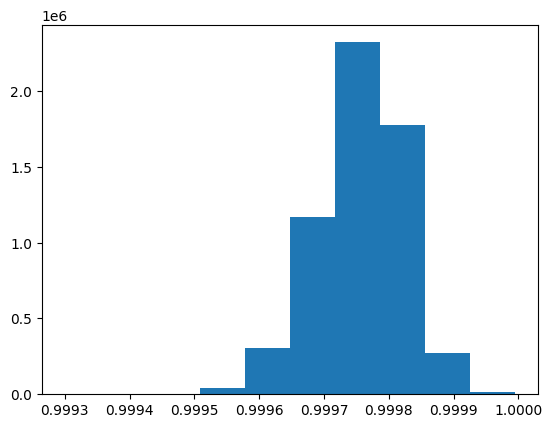

In [44]:
# plot histogram of losses (0-4) for all 400 x 14777 elements, against their similarity score (sims)
plt.hist(np.array(sims)[np.array(losses <= 4).astype(bool)]) # plot exact matches as a function of their similarity score, color by loss


(array([2.00000e+01, 8.70000e+01, 4.89000e+02, 5.52100e+03, 4.13550e+04,
        1.89048e+05, 4.97100e+05, 4.78148e+05, 1.00329e+05, 1.44390e+04]),
 array([0.99929929, 0.99936885, 0.99943841, 0.99950796, 0.99957752,
        0.99964714, 0.9997167 , 0.99978626, 0.99985582, 0.99992537,
        0.99999493]),
 <BarContainer object of 10 artists>)

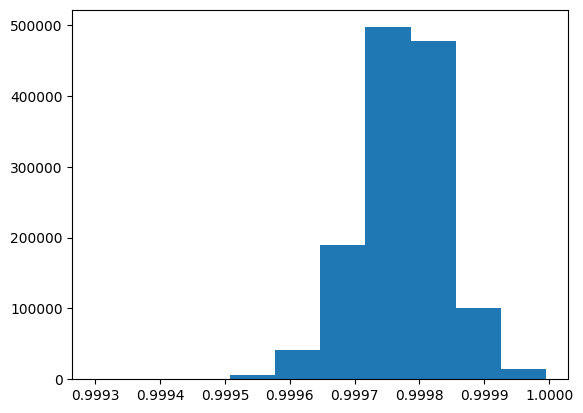

In [45]:
plt.hist(np.array(sims)[np.array(losses <= 3).astype(bool)]) # plot exact matches as a function of their similarity score, color by loss


(array([8.0000e+00, 2.7000e+01, 1.5100e+02, 6.1600e+02, 2.4230e+03,
        9.6650e+03, 2.1429e+04, 2.3223e+04, 1.7967e+04, 8.4220e+03]),
 array([0.99946272, 0.99951595, 0.99956918, 0.9996224 , 0.99967563,
        0.9997288 , 0.99978203, 0.99983525, 0.99988848, 0.99994171,
        0.99999493]),
 <BarContainer object of 10 artists>)

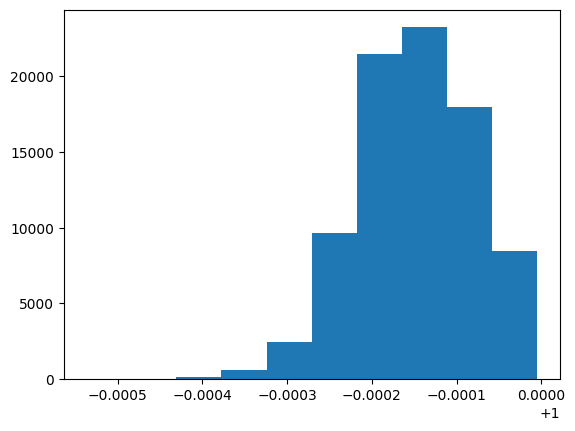

In [46]:
plt.hist(np.array(sims)[np.array(losses <= 2).astype(bool)]) # plot exact matches as a function of their similarity score, color by loss


(array([1.000e+00, 4.000e+00, 4.000e+01, 2.080e+02, 7.140e+02, 1.716e+03,
        3.580e+03, 5.690e+03, 8.010e+03, 4.774e+03]),
 array([0.99958587, 0.99962676, 0.9996677 , 0.99970859, 0.99974948,
        0.99979043, 0.99983132, 0.99987221, 0.9999131 , 0.99995404,
        0.99999493]),
 <BarContainer object of 10 artists>)

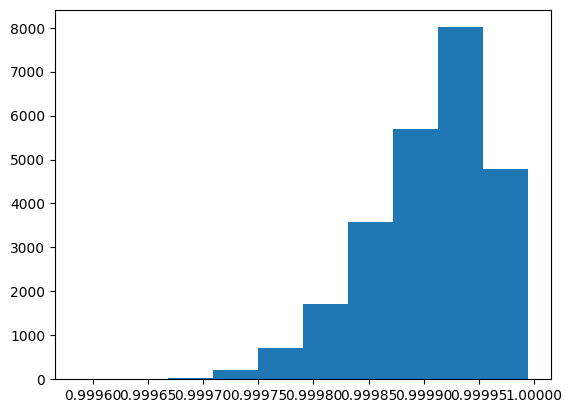

In [47]:
plt.hist(np.array(sims)[np.array(losses <= 1).astype(bool)]) # plot exact matches as a function of their similarity score, color by loss


(array([2.000e+00, 2.800e+01, 5.000e+01, 1.160e+02, 2.260e+02, 5.170e+02,
        9.510e+02, 1.644e+03, 3.112e+03, 1.710e+03]),
 array([0.9996711 , 0.99970347, 0.99973589, 0.99976826, 0.99980062,
        0.99983299, 0.99986541, 0.99989778, 0.99993014, 0.99996257,
        0.99999493]),
 <BarContainer object of 10 artists>)

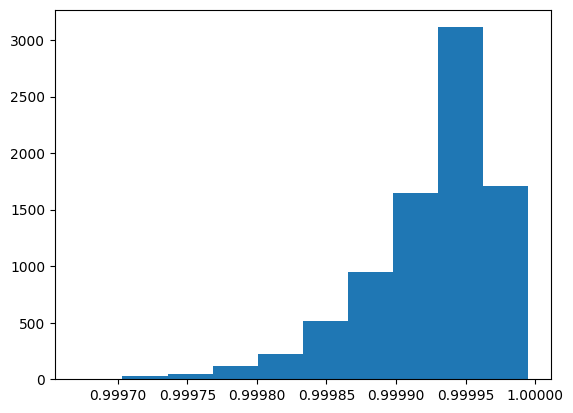

In [48]:
plt.hist(np.array(sims)[np.array(losses == 0).astype(bool)]) # plot exact matches as a function of their similarity score, color by loss


### Run conformal procedure

For now, we use 300 to calibrate, 100 to test on. We use the exact matches as labels (for now).
Still need to do a plot of the loss density by height, but the above plots looking at similarity thresholds give a sense of how the scores consistently shift rightwards as you constrain the lambda/cutoff to be higher and higher.

In [50]:
labels = np.stack([query['exact'] for query in near_ids], axis=0)
sims = np.stack([query['S_i'] for query in near_ids], axis=0)


alpha = 0.1
lhat = get_thresh_FDR(labels, sims, alpha, delta=0.5, N=100)

sims.max: 0.9999949336051941
lhat: 0.999987906879849
risk: 0.03583333333333333


/tmp/ipykernel_20366/2968006915.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  z = (r_hat - alpha) / (std_hat / np.sqrt(n))


In [51]:
def validate_lhat(data, lhat):
    total_missed = 0
    total_missed_partial = 0
    total_exact = 0
    total_inexact_identified = 0
    total_identified = 0
    total_partial = 0
    total_partial_identified = 0
    for query in data:
        idx = query['exact']
        # if partial has multiple rows, we want to take the logical or of all of them. Otherwise just set it to the single row
        # check if there is one or more rows
        # query['partial'] = np.array(query['partial'])
        if len(np.array(query['partial']).shape) > 1:
            idx_partial = np.logical_or.reduce(query['partial'], axis=1)
        else:
            idx_partial = query['partial']
        
        sims = query['S_i']
        sims_exact = sims[idx]
        sims_partial = sims[idx_partial]
        total_missed += (sims_exact < lhat).sum()

        # TODO: are there any divisions by zero here?
        total_missed_partial += (sims_partial < lhat).sum()
        total_partial_identified += (sims_partial >= lhat).sum()
        total_partial += len(sims_partial)

        total_exact += len(sims_exact)
        total_inexact_identified += (sims[~np.array(idx)] >= lhat).sum()
        total_identified += (sims >= lhat).sum()
    return total_missed/total_exact, total_inexact_identified/total_identified, total_missed_partial/total_partial, total_partial_identified/total_identified

In [52]:
num_trials = 3
alpha = 0.1
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat = get_thresh(cal_data, alpha)
    error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


/tmp/ipykernel_20366/2968006915.py:34: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  lhat = np.quantile(all_sim_exact, np.maximum(alpha-(1-alpha)/n, 0), interpolation='lower')


Trial 1: Ex&!Id/Ex: 0.10, In/Id: 0.96, Pa&!Id/Pa: 0.22, Pa&Id/Id: 0.08
Trial 2: Ex&!Id/Ex: 0.07, In/Id: 0.97, Pa&!Id/Pa: 0.18, Pa&Id/Id: 0.07
Trial 3: Ex&!Id/Ex: 0.12, In/Id: 0.97, Pa&!Id/Pa: 0.25, Pa&Id/Id: 0.07


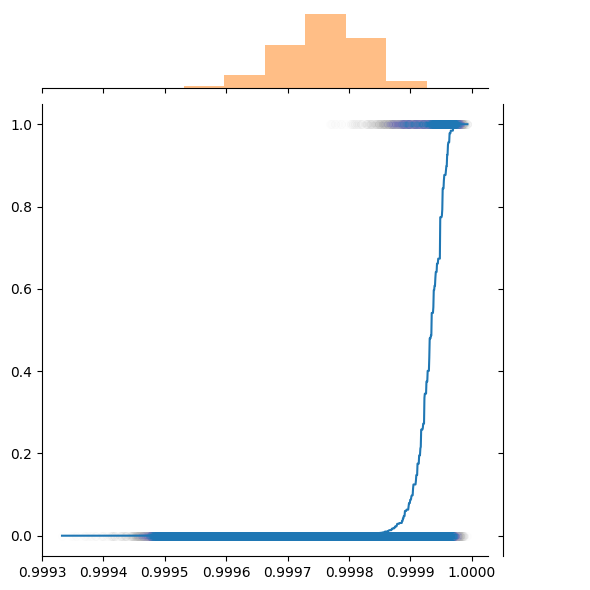

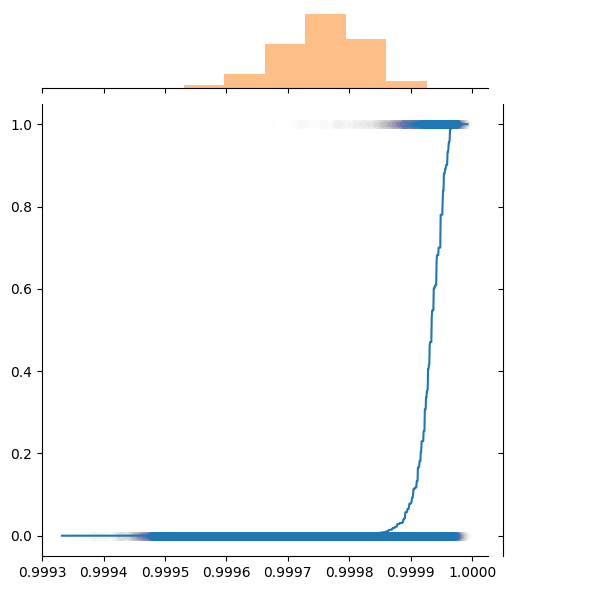

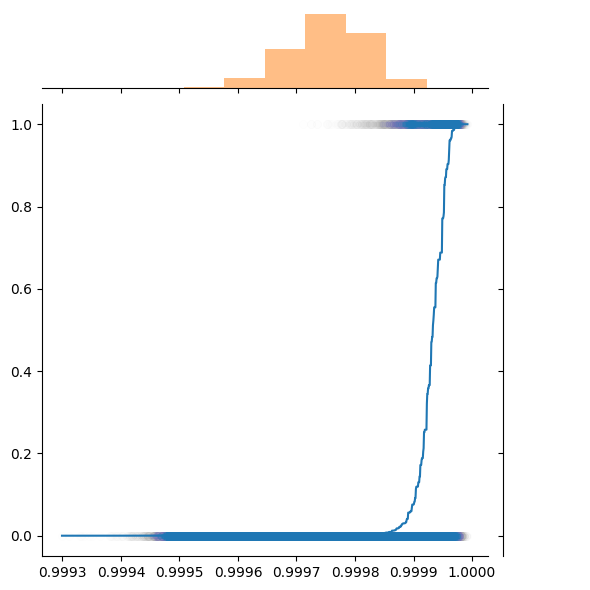

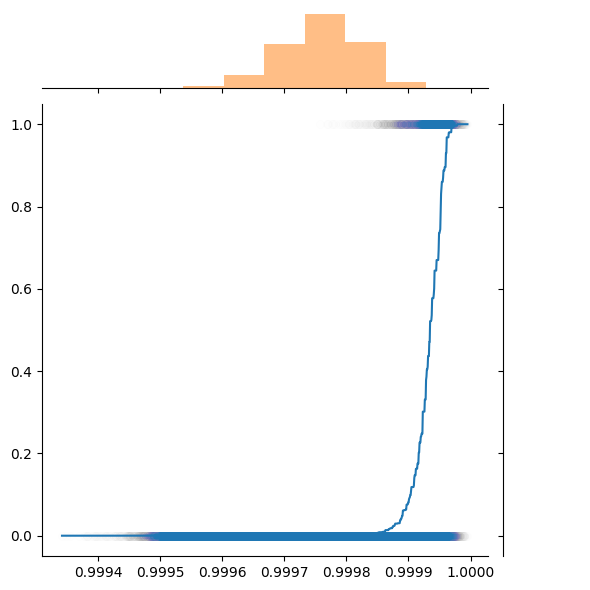

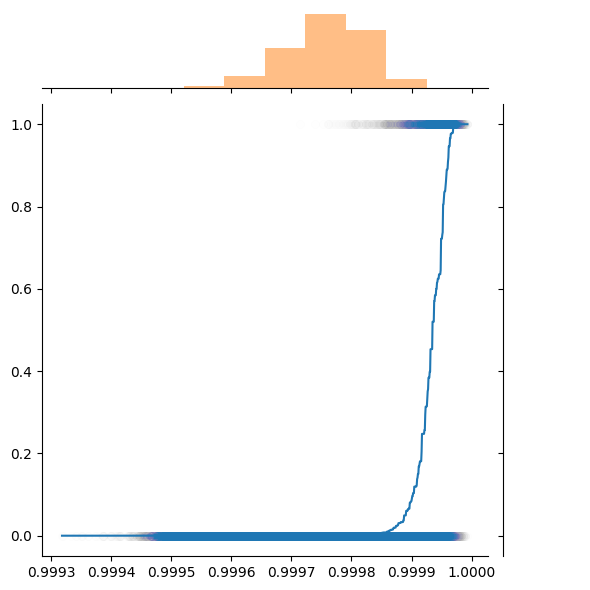

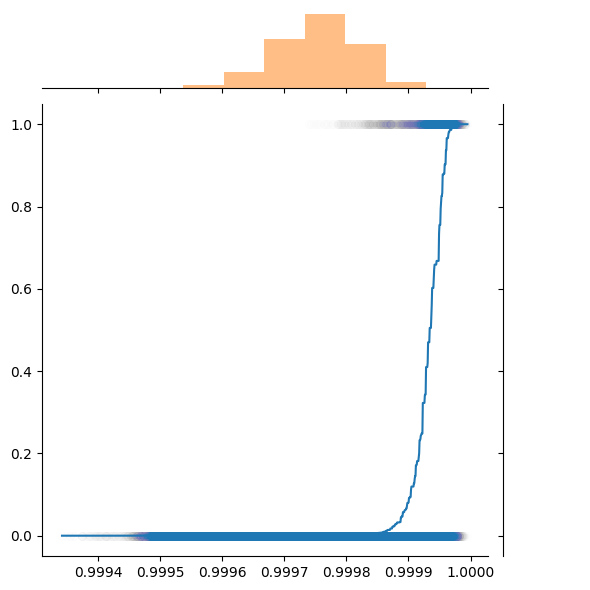

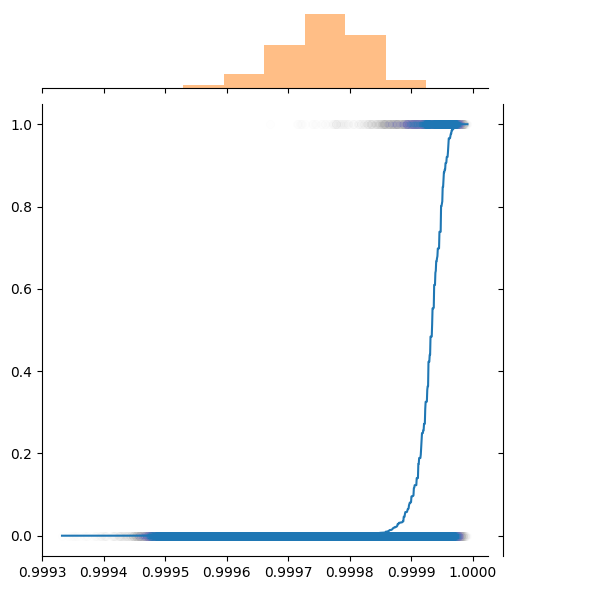

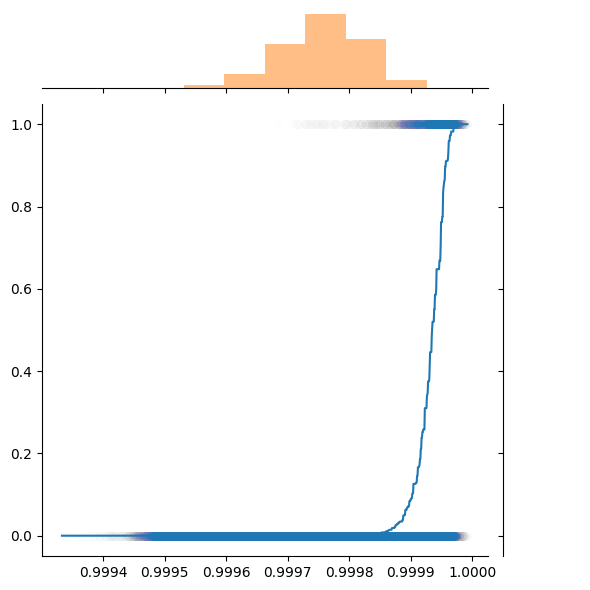

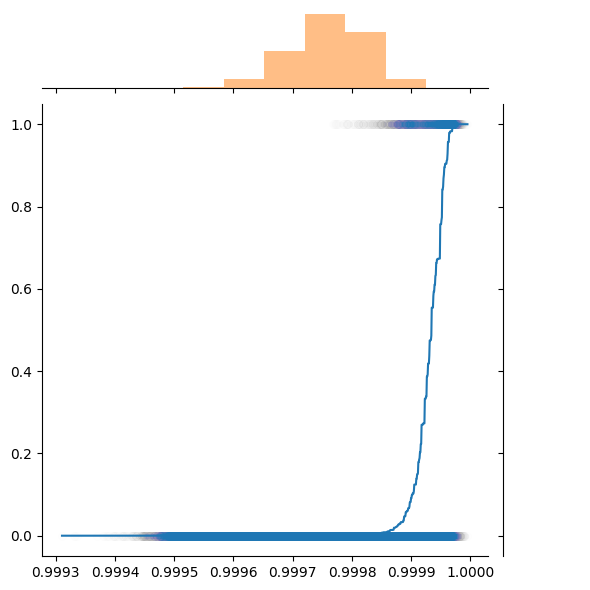

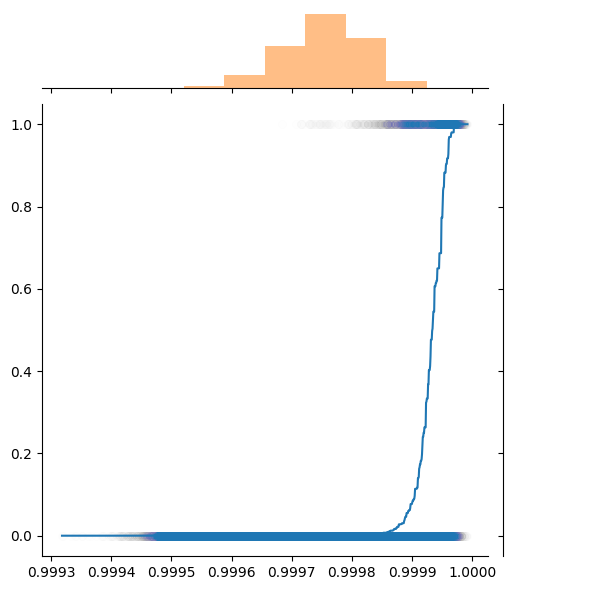

In [53]:
num_trials = 10
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    ir = get_isotone_regression(cal_data)
    sims, labels = get_sims_labels(test_data, partial=False)
    preds = ir.predict(sims)
    g = sns.JointGrid()
    g.ax_joint.scatter(sims, labels, alpha=0.003)
    x = np.linspace(min(sims), max(sims), 1000)
    phats = ir.predict(x)
    g.ax_joint.plot(x, phats)
    g.ax_marg_x.hist(np.array(sims)[np.array(labels)], label='1', alpha=0.5)
    g.ax_marg_x.hist(np.array(sims)[~np.array(labels)], label='0', alpha=0.5)
    plt.show()
    ##print()
#
    #plt.figure()
    #sim_bins = np.linspace(min(sims), max(sims), 100)
    #plt.hist(np.array(sims)[np.array(labels)], bins=sim_bins, alpha=0.5, label='1')
    #plt.hist(np.array(sims)[~np.array(labels)], bins=sim_bins, alpha=0.5, label='0')
    #plt.legend()

    

## save as pkl to do sanity sensitivty test

In [108]:
scope_emb = '/home/seyonec/protein-vec/src_run/protein_vec_embeddings/scope_all_query_embeddings.npy'
## open with numpy, save with pkl
scope_emb = np.load(scope_emb)
scope_emb.shape
# save as pkl
import pickle
with open('/home/seyonec/protein-vec/src_run/protein_vec_embeddings/scope_all_query_embeddings.pkl', 'wb') as f:
    pickle.dump(scope_emb, f)

# all vs all

In [15]:
from scope_utils import scope_hierarchical_loss, load_database, query
# in this case we want to do all vs all search, so our lookup and query are the same
lookup = load_database(scope_protein_vec)
#query = load_database(scope_protein_vec)

## get distance matrix
D, I = query(lookup, scope_protein_vec, k=15177)



In [16]:
D.shape

(15177, 15177)

In [18]:
## Save the distance matrix, and index matrix
np.save('scope_protein_vec_distance_matrix.npy', D)
np.save('scope_protein_vec_index_matrix.npy', I)

In [28]:
import pandas as pd
scope_df = pd.read_csv('/home/seyonec/toph/data/scope/df_from_fasta.csv', sep=',', index_col=0)
scope_df.head()

## uppercase sequences
scope_df['sequence'] = scope_df['sequence'].apply(lambda x: x.upper())


In [24]:
scope_labels = scope_df['sccs'].tolist()

In [30]:
# for each row in I, find the threshold for similiarity that ensures that the sccs are the same with the query, by using the row index and entry index and scope_labels to compare if they are the same
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        if scope_labels[i] == scope_labels[I[i,j]]:
            print(i, I[i,j], D[i,j], scope_labels[i], scope_labels[I[i,j]])
            break

0 0 1.0 a.1.1.1 a.1.1.1
1 1 1.0 a.1.1.1 a.1.1.1
2 2 1.0 a.1.1.1 a.1.1.1
3 3 1.0 a.1.1.1 a.1.1.1
4 4 1.0000002 a.1.1.1 a.1.1.1
5 5 0.99999994 a.1.1.2 a.1.1.2
6 6 0.9999997 a.1.1.2 a.1.1.2
7 7 1.0000001 a.1.1.2 a.1.1.2
8 8 0.99999976 a.1.1.2 a.1.1.2
9 9 1.0000001 a.1.1.2 a.1.1.2
10 10 1.0000002 a.1.1.2 a.1.1.2
11 11 1.0000002 a.1.1.2 a.1.1.2
12 12 1.0000001 a.1.1.2 a.1.1.2
13 13 0.99999976 a.1.1.2 a.1.1.2
14 14 1.0 a.1.1.2 a.1.1.2
15 15 1.0000002 a.1.1.2 a.1.1.2
16 16 1.0 a.1.1.2 a.1.1.2
17 17 0.99999994 a.1.1.2 a.1.1.2
18 18 1.0000001 a.1.1.2 a.1.1.2
19 19 0.9999999 a.1.1.2 a.1.1.2
20 20 1.0000002 a.1.1.2 a.1.1.2
21 21 1.0000002 a.1.1.2 a.1.1.2
22 22 1.0000001 a.1.1.2 a.1.1.2
23 23 1.0000001 a.1.1.2 a.1.1.2
24 24 1.0000005 a.1.1.2 a.1.1.2
25 25 0.9999999 a.1.1.2 a.1.1.2
26 26 1.0000001 a.1.1.2 a.1.1.2
27 27 1.0 a.1.1.2 a.1.1.2
28 28 0.9999999 a.1.1.2 a.1.1.2
29 29 0.9999999 a.1.1.2 a.1.1.2
30 30 1.0000001 a.1.1.3 a.1.1.3
31 31 1.0000002 a.1.1.3 a.1.1.3
32 32 1.0 a.1.1.3 a.1.1.3
33 33 0.

### todo
- get data into format of conformal pfam dataset (look at Ron/Anastasios code)
- get conformal lambda analysis working 
- generate similar FNR/FPR plot

In [12]:
D = np.load('scope_protein_vec_distance_matrix.npy')
I = np.load('scope_protein_vec_index_matrix.npy')

In [19]:
match = slice == I[:, 0]
# sum number of trues in match 
np.sum(match) ## all are self match

15177

In [15]:
I[:, 0]

array([    0,     1,     2, ..., 15174, 15175, 15176])

In [13]:
# check if np array is ascending
slice = I[:, 0].copy()
slice.sort() == I[:, 0]

array([False, False, False, ..., False, False, False])

In [22]:
data[1]

{'meta': array(['PF19429;', 'PF19429;', 'PF19429;', ..., 'PF08259;', 'PF08259;',
        'PF08259;'], dtype=object),
 'meta_query': 'PF19429;',
 'exact': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  F

In [1]:
import numpy as np
data = np.load('/home/ron/protein-conformal/conformal_pfam_with_lookup_dataset.npy', allow_pickle=True)

data.shape

(10000,)

In [2]:
len(data[0]['exact'])

10000

In [3]:
data

array([{'meta': array(['PF01266;', 'PF01266;', 'PF01266;', ..., 'PF02803;PF00108;',
              'PF04072;', 'PF01255;'], dtype=object), 'meta_query': 'PF01266;', 'exact': [True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru